In [1]:
#Final Project Report
#By: Alberto Vera, Group ID 13
#NFL Games Dataset
#Dataset can be found here. --> github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-04

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action ='ignore', category=FutureWarning)

%matplotlib inline 

In [3]:
# games = pd.read_csv('/Users/albertovera/Desktop/BIA 610 Applied Analytics/Project_Files/games.csv')
games = pd.read_csv("games.csv")
games.head()

,year,week,home_team,away_team,winner,tie,day,date,time,pts_win,pts_loss,yds_win,turnovers_win,yds_loss,turnovers_loss,home_team_name,home_team_city,away_team_name,away_team_city
0,2000,1,Minnesota Vikings,Chicago Bears,Minnesota Vikings,NaN,Sun,September 3,1:00PM,30,27,374,1,425,1,Vikings,Minnesota,Bears,Chicago
1,2000,1,Kansas City Chiefs,Indianapolis Colts,Indianapolis Colts,NaN,Sun,September 3,1:00PM,27,14,386,2,280,1,Chiefs,Kansas City,Colts,Indianapolis
2,2000,1,Washington Redskins,Carolina Panthers,Washington Redskins,NaN,Sun,September 3,1:01PM,20,17,396,0,236,1,Redskins,Washington,Panthers,Carolina
3,2000,1,Atlanta Falcons,San Francisco 49ers,Atlanta Falcons,NaN,Sun,September 3,1:02PM,36,28,359,1,339,1,Falcons,Atlanta,49ers,San Francisco
4,2000,1,Pittsburgh Steelers,Baltimore Ravens,Baltimore Ravens,NaN,Sun,September 3,1:02PM,16,0,336,0,223,1,Steelers,Pittsburgh,Ravens,Baltimore


In [4]:
#Will not drop tie column, will just exclude from further subsetted dataframes
print(games.shape)
pd.isna(games).sum()

(5324, 19)


year                 0
week                 0
home_team            0
away_team            0
winner               0
tie               5314
day                  0
date                 0
time                 0
pts_win              0
pts_loss             0
yds_win              0
turnovers_win        0
yds_loss             0
turnovers_loss       0
home_team_name       0
home_team_city       0
away_team_name       0
away_team_city       0
dtype: int64

In [5]:
games23 = games[['away_team', 'home_team', 'pts_win', 'pts_loss', 'yds_win', 'yds_loss', 'turnovers_win', 'turnovers_loss','winner', 'date', 'year']]
games23

,away_team,home_team,pts_win,pts_loss,yds_win,yds_loss,turnovers_win,turnovers_loss,winner,date,year
0,Chicago Bears,Minnesota Vikings,30,27,374,425,1,1,Minnesota Vikings,September 3,2000
1,Indianapolis Colts,Kansas City Chiefs,27,14,386,280,2,1,Indianapolis Colts,September 3,2000
2,Carolina Panthers,Washington Redskins,20,17,396,236,0,1,Washington Redskins,September 3,2000
3,San Francisco 49ers,Atlanta Falcons,36,28,359,339,1,1,Atlanta Falcons,September 3,2000
4,Baltimore Ravens,Pittsburgh Steelers,16,0,336,223,0,1,Baltimore Ravens,September 3,2000
...,...,...,...,...,...,...,...,...,...,...,...
5319,Houston Texans,Kansas City Chiefs,51,31,434,442,1,1,Kansas City Chiefs,January 12,2019
5320,Seattle Seahawks,Green Bay Packers,28,23,344,375,0,0,Green Bay Packers,January 12,2019
5321,Tennessee Titans,Kansas City Chiefs,35,24,404,295,0,0,Kansas City Chiefs,January 19,2019
5322,Green Bay Packers,San Francisco 49ers,37,20,354,358,0,3,San Francisco 49ers,January 19,2019


In [6]:
#Subsetting Data to Begin in 2015-2016 Season instead of 2000-2001. Total Seasons in Dataframe will be 4 Seasons
games23 = games23[games23['year']>2014].reset_index()
games23 = games23.rename(columns={'away_team':'away', 'home_team':'home'})
games23

,index,away,home,pts_win,pts_loss,yds_win,yds_loss,turnovers_win,turnovers_loss,winner,date,year
0,3989,Pittsburgh Steelers,New England Patriots,28,21,361,464,0,1,New England Patriots,September 10,2015
1,3990,Seattle Seahawks,St. Louis Rams,34,31,352,343,3,1,St. Louis Rams,September 13,2015
2,3991,Green Bay Packers,Chicago Bears,31,23,322,402,0,1,Green Bay Packers,September 13,2015
3,3992,Miami Dolphins,Washington Redskins,17,10,256,349,1,2,Miami Dolphins,September 13,2015
4,3993,Kansas City Chiefs,Houston Texans,27,20,330,396,0,2,Kansas City Chiefs,September 13,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
1330,5319,Houston Texans,Kansas City Chiefs,51,31,434,442,1,1,Kansas City Chiefs,January 12,2019
1331,5320,Seattle Seahawks,Green Bay Packers,28,23,344,375,0,0,Green Bay Packers,January 12,2019
1332,5321,Tennessee Titans,Kansas City Chiefs,35,24,404,295,0,0,Kansas City Chiefs,January 19,2019
1333,5322,Green Bay Packers,San Francisco 49ers,37,20,354,358,0,3,San Francisco 49ers,January 19,2019


In [7]:
games23['home_win'] = np.where(games23['winner'] == games23['home'],1,0)
games23['away_win'] = np.where(games23['winner'] == games23['away'],1,0)
games23['count'] = 1
games23

,index,away,home,pts_win,pts_loss,yds_win,yds_loss,turnovers_win,turnovers_loss,winner,date,year,home_win,away_win,count
0,3989,Pittsburgh Steelers,New England Patriots,28,21,361,464,0,1,New England Patriots,September 10,2015,1,0,1
1,3990,Seattle Seahawks,St. Louis Rams,34,31,352,343,3,1,St. Louis Rams,September 13,2015,1,0,1
2,3991,Green Bay Packers,Chicago Bears,31,23,322,402,0,1,Green Bay Packers,September 13,2015,0,1,1
3,3992,Miami Dolphins,Washington Redskins,17,10,256,349,1,2,Miami Dolphins,September 13,2015,0,1,1
4,3993,Kansas City Chiefs,Houston Texans,27,20,330,396,0,2,Kansas City Chiefs,September 13,2015,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,5319,Houston Texans,Kansas City Chiefs,51,31,434,442,1,1,Kansas City Chiefs,January 12,2019,1,0,1
1331,5320,Seattle Seahawks,Green Bay Packers,28,23,344,375,0,0,Green Bay Packers,January 12,2019,1,0,1
1332,5321,Tennessee Titans,Kansas City Chiefs,35,24,404,295,0,0,Kansas City Chiefs,January 19,2019,1,0,1
1333,5322,Green Bay Packers,San Francisco 49ers,37,20,354,358,0,3,San Francisco 49ers,January 19,2019,1,0,1


In [8]:
#use groupby to subset by home wins
games4home = games23.groupby('home')['home_win', 'pts_win', 'pts_loss','yds_win', 'yds_loss','turnovers_win', 'turnovers_loss','count'].sum().reset_index()
games4home = games4home.rename(columns={'pts_win':'pts_for', 'pts_loss':'pts_against','yds_win':'yards_for','yds_loss':'yards_against','turnovers_win':'turnovers_against','turnovers_loss':'turnovers_for','count':'gamesplayedhome','home':'team'})
games4home

,team,home_win,pts_for,pts_against,yards_for,yards_against,turnovers_against,turnovers_for,gamesplayedhome
0,Arizona Cardinals,19,1144,671,15133,12586,38,78,41
1,Atlanta Falcons,23,1264,844,16597,14928,35,73,42
2,Baltimore Ravens,27,1175,676,15445,12774,40,76,42
3,Buffalo Bills,23,1119,635,14330,12586,32,76,40
4,Carolina Panthers,27,1251,760,15219,14351,33,114,42
5,Chicago Bears,18,1013,654,13828,12743,33,67,41
6,Cincinnati Bengals,20,1145,648,15664,13170,30,83,41
7,Cleveland Browns,12,1085,622,15171,12325,44,77,40
8,Dallas Cowboys,24,1257,751,16326,13862,23,73,42
9,Denver Broncos,26,1035,668,14071,13380,44,77,43


In [9]:
#Use groupby function to subset by away wins
games4away = games23.groupby('away')['away_win', 'pts_win', 'pts_loss', 'yds_win', 'yds_loss','turnovers_win', 'turnovers_loss','count'].sum().reset_index()
games4away = games4away.rename(columns={'pts_win':'pts_for', 'pts_loss':'pts_against', 'yds_win':'yards_for','yds_loss':'yards_against','turnovers_win':'turnovers_against','turnovers_loss':'turnovers_for','count':'gamesplayedaway','away':'team'})
games4away

,team,away_win,pts_for,pts_against,yards_for,yards_against,turnovers_against,turnovers_for,gamesplayedaway
0,Arizona Cardinals,18,1284,702,15360,12373,41,92,41
1,Atlanta Falcons,23,1255,799,16515,14955,37,68,43
2,Baltimore Ravens,19,1143,666,15122,11928,38,74,40
3,Buffalo Bills,17,1089,603,14404,12876,30,82,42
4,Carolina Panthers,19,1252,784,15155,13698,39,89,42
5,Chicago Bears,16,1043,597,14205,12136,43,81,40
6,Cincinnati Bengals,13,1067,673,14950,12339,38,55,40
7,Cleveland Browns,5,1154,688,15418,13339,40,85,40
8,Dallas Cowboys,21,1018,617,15283,12582,40,61,41
9,Denver Broncos,16,1049,587,13935,12305,41,91,40


In [10]:
NFLfullstat01to19 = pd.merge(games4home, games4away, on ='team')
NFLfullstat01to19 

,team,home_win,pts_for_x,pts_against_x,yards_for_x,yards_against_x,turnovers_against_x,turnovers_for_x,gamesplayedhome,away_win,pts_for_y,pts_against_y,yards_for_y,yards_against_y,turnovers_against_y,turnovers_for_y,gamesplayedaway
0,Arizona Cardinals,19,1144,671,15133,12586,38,78,41,18,1284,702,15360,12373,41,92,41
1,Atlanta Falcons,23,1264,844,16597,14928,35,73,42,23,1255,799,16515,14955,37,68,43
2,Baltimore Ravens,27,1175,676,15445,12774,40,76,42,19,1143,666,15122,11928,38,74,40
3,Buffalo Bills,23,1119,635,14330,12586,32,76,40,17,1089,603,14404,12876,30,82,42
4,Carolina Panthers,27,1251,760,15219,14351,33,114,42,19,1252,784,15155,13698,39,89,42
5,Chicago Bears,18,1013,654,13828,12743,33,67,41,16,1043,597,14205,12136,43,81,40
6,Cincinnati Bengals,20,1145,648,15664,13170,30,83,41,13,1067,673,14950,12339,38,55,40
7,Cleveland Browns,12,1085,622,15171,12325,44,77,40,5,1154,688,15418,13339,40,85,40
8,Dallas Cowboys,24,1257,751,16326,13862,23,73,42,21,1018,617,15283,12582,40,61,41
9,Denver Broncos,26,1035,668,14071,13380,44,77,43,16,1049,587,13935,12305,41,91,40


In [11]:
NFLfullstat01to19['Wins'] = NFLfullstat01to19['home_win']+NFLfullstat01to19['away_win']
NFLfullstat01to19['Games'] = NFLfullstat01to19['gamesplayedhome']+NFLfullstat01to19['gamesplayedaway']
NFLfullstat01to19['Points_Gained'] = NFLfullstat01to19['pts_for_x'] + NFLfullstat01to19['pts_for_y']
NFLfullstat01to19['Points_Conceded'] = NFLfullstat01to19['pts_against_x'] + NFLfullstat01to19['pts_against_y']
NFLfullstat01to19['Yards_Gained']= NFLfullstat01to19['yards_for_x'] + NFLfullstat01to19['yards_for_y']
NFLfullstat01to19['Yards_Conceded'] = NFLfullstat01to19['yards_against_x'] + NFLfullstat01to19['yards_against_x']
NFLfullstat01to19['BadTurnovers'] = NFLfullstat01to19['turnovers_against_x']+NFLfullstat01to19['turnovers_against_y']
NFLfullstat01to19['GoodTurnovers'] = NFLfullstat01to19['turnovers_for_x']+NFLfullstat01to19['turnovers_for_y']
NFLcombinedstats = NFLfullstat01to19.groupby('team')['Wins','Games','Points_Gained', 'Points_Conceded','Yards_Gained', 'Yards_Conceded', 'GoodTurnovers', 'BadTurnovers'].sum()
NFLcombinedstats

,Wins,Games,Points_Gained,Points_Conceded,Yards_Gained,Yards_Conceded,GoodTurnovers,BadTurnovers
team,,,,,,,,
Arizona Cardinals,37,82,2428,1373,30493,25172,170,79
Atlanta Falcons,46,85,2519,1643,33112,29856,141,72
Baltimore Ravens,46,82,2318,1342,30567,25548,150,78
Buffalo Bills,40,82,2208,1238,28734,25172,158,62
Carolina Panthers,46,84,2503,1544,30374,28702,203,72
Chicago Bears,34,81,2056,1251,28033,25486,148,76
Cincinnati Bengals,33,81,2212,1321,30614,26340,138,68
Cleveland Browns,17,80,2239,1310,30589,24650,162,84
Dallas Cowboys,45,83,2275,1368,31609,27724,134,63


In [12]:
#Used rename function on teams that changed names--> Chargers and Rams(merge results)
#In 2017 the San Diego Chargers RENAMED to the Los Angeles Chargers
#In 2016 the Saint Louis Rams RENAMED to the Los Angeles Rams
#New team name used for simplicity
NFLcombinedstats.rename(index={'St. Louis Rams' : 'Los Angeles Rams'}, inplace =True)
NFLcombinedstats.rename(index={'San Diego Chargers' : 'Los Angeles Chargers'}, inplace =True)

In [13]:
NFLcombinedstats1 = NFLcombinedstats.groupby('team')['Wins','Games','Points_Gained', 'Points_Conceded','Yards_Gained', 'Yards_Conceded', 'GoodTurnovers', 'BadTurnovers'].sum()
NFLcombinedstats1

,Wins,Games,Points_Gained,Points_Conceded,Yards_Gained,Yards_Conceded,GoodTurnovers,BadTurnovers
team,,,,,,,,
Arizona Cardinals,37,82,2428,1373,30493,25172,170,79
Atlanta Falcons,46,85,2519,1643,33112,29856,141,72
Baltimore Ravens,46,82,2318,1342,30567,25548,150,78
Buffalo Bills,40,82,2208,1238,28734,25172,158,62
Carolina Panthers,46,84,2503,1544,30374,28702,203,72
Chicago Bears,34,81,2056,1251,28033,25486,148,76
Cincinnati Bengals,33,81,2212,1321,30614,26340,138,68
Cleveland Browns,17,80,2239,1310,30589,24650,162,84
Dallas Cowboys,45,83,2275,1368,31609,27724,134,63


In [14]:
#Define the Win Percentage and Pythagroean Epectation(Expected Win Percentage)
NFLcombinedstats1['WinPerc'] = NFLcombinedstats1['Wins']/NFLcombinedstats1['Games']
NFLcombinedstats1['Pyth'] = NFLcombinedstats1['Points_Gained']**2/(NFLcombinedstats1['Points_Gained']**2 + NFLcombinedstats1['Points_Conceded']**2)
NFLcombinedstats1

,Wins,Games,Points_Gained,Points_Conceded,Yards_Gained,Yards_Conceded,GoodTurnovers,BadTurnovers,WinPerc,Pyth
team,,,,,,,,,,
Arizona Cardinals,37,82,2428,1373,30493,25172,170,79,0.451220,0.757705
Atlanta Falcons,46,85,2519,1643,33112,29856,141,72,0.541176,0.701547
Baltimore Ravens,46,82,2318,1342,30567,25548,150,78,0.560976,0.748963
Buffalo Bills,40,82,2208,1238,28734,25172,158,62,0.487805,0.760820
Carolina Panthers,46,84,2503,1544,30374,28702,203,72,0.547619,0.724367
Chicago Bears,34,81,2056,1251,28033,25486,148,76,0.419753,0.729806
Cincinnati Bengals,33,81,2212,1321,30614,26340,138,68,0.407407,0.737113
Cleveland Browns,17,80,2239,1310,30589,24650,162,84,0.212500,0.744978
Dallas Cowboys,45,83,2275,1368,31609,27724,134,63,0.542169,0.734439


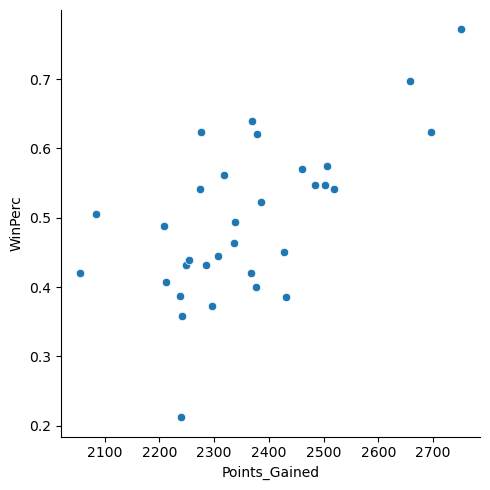

In [15]:
sns.relplot(x='Points_Gained', y='WinPerc', data = NFLcombinedstats1)

In [16]:
pyth_lm = smf.ols(formula = 'WinPerc ~ Points_Gained', data=NFLcombinedstats1).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                WinPerc   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     20.68
Date:                Sun, 14 May 2023   Prob (F-statistic):           8.34e-05
Time:                        17:19:53   Log-Likelihood:                 33.278
No. Observations:                  32   AIC:                            -62.56
Df Residuals:                      30   BIC:                            -59.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.5853      0.238     -2.454      0.020      -1.072      -0.098
Points_Gained     0.0005      0.000      4.547      0.000       0.000       0.001
==============================================================================
Omnibus:                        0.844   Durbin-Watson:                   2.360
Prob(Omnibus):                  0.656   Jarque-Bera (JB):                0.316
Skew:                          -0.235   Prob(JB):                        0.854
Kurtosis:                       3.128   Cond. No.                     3.61e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
#Project Question 1
#1. Who was the most succesful team from the 2015 till the 2018 season? (Using the win to game ratio)

MostSuccess = NFLcombinedstats1.pivot_table(index = 'team', values = 'WinPerc', aggfunc = np.sum)
MostSuccess = MostSuccess.sort_values('WinPerc', ascending=False)
MWin = NFLcombinedstats1.groupby('team')['WinPerc'].sum().idxmax()
print(f"The most successful NFL in the timeframe was the: {MWin}!")
MostSuccess.head(7)

The most successful NFL in the timeframe was the: New England Patriots!


,WinPerc
team,
New England Patriots,0.771739
Kansas City Chiefs,0.696629
Pittsburgh Steelers,0.639535
Minnesota Vikings,0.623529
New Orleans Saints,0.623529
Seattle Seahawks,0.620690
Green Bay Packers,0.574713


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31],
 [Text(0, 0, 'Arizona Cardinals'),
  Text(1, 0, 'Atlanta Falcons'),
  Text(2, 0, 'Baltimore Ravens'),
  Text(3, 0, 'Buffalo Bills'),
  Text(4, 0, 'Carolina Panthers'),
  Text(5, 0, 'Chicago Bears'),
  Text(6, 0, 'Cincinnati Bengals'),
  Text(7, 0, 'Cleveland Browns'),
  Text(8, 0, 'Dallas Cowboys'),
  Text(9, 0, 'Denver Broncos'),
  Text(10, 0, 'Detroit Lions'),
  Text(11, 0, 'Green Bay Packers'),
  Text(12, 0, 'Houston Texans'),
  Text(13, 0, 'Indianapolis Colts'),
  Text(14, 0, 'Jacksonville Jaguars'),
  Text(15, 0, 'Kansas City Chiefs'),
  Text(16, 0, 'Los Angeles Chargers'),
  Text(17, 0, 'Los Angeles Rams'),
  Text(18, 0, 'Miami Dolphins'),
  Text(19, 0, 'Minnesota Vikings'),
  Text(20, 0, 'New England Patriots'),
  Text(21, 0, 'New Orleans Saints'),
  Text(22, 0, 'New York Giants'),
  Text(23, 0, 'Ne

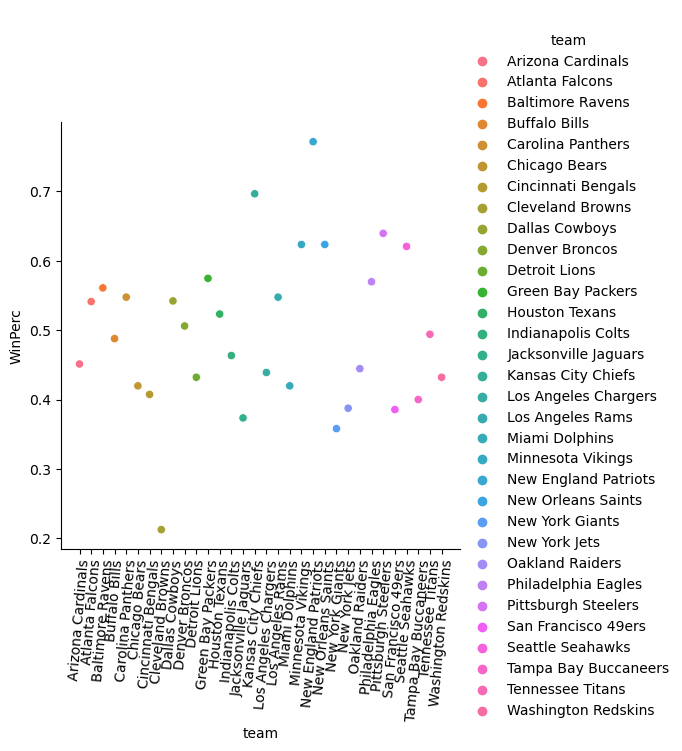

In [18]:
sns.relplot(x='team', y='WinPerc', data=NFLcombinedstats1, hue = 'team')
plt.xticks(rotation=85, ha='center')

In [19]:
#As we can see from our analysis the New England Patriots had the highest win percentage of any team and our visualization
#puts this into visual comparison by also highlighting them as an outlier in the plot above!

In [20]:
#2. Which team in the last 4 seasons leading up to the 2018 season had the best turnover ratio?
#single out turnover ratio and the ascending = FALSE
MostPossesion = NFLcombinedstats1.pivot_table(index = 'team', values = 'GoodTurnovers', aggfunc = np.sum)
MostPossesion = MostPossesion.sort_values('GoodTurnovers', ascending=False)
MTurn = NFLcombinedstats1.groupby('team')['GoodTurnovers'].sum().idxmax()
print(f"The team with the best turnover ratio was the: {MTurn}!")
MostPossesion.head(7)

The team with the best turnover ratio was the: Carolina Panthers!


,GoodTurnovers
team,
Carolina Panthers,203
Tampa Bay Buccaneers,197
New York Jets,174
Arizona Cardinals,170
Denver Broncos,168
Pittsburgh Steelers,168
Los Angeles Rams,166


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Arizona Cardinals'),
  Text(1, 0, 'Atlanta Falcons'),
  Text(2, 0, 'Baltimore Ravens'),
  Text(3, 0, 'Buffalo Bills'),
  Text(4, 0, 'Carolina Panthers'),
  Text(5, 0, 'Chicago Bears'),
  Text(6, 0, 'Cincinnati Bengals'),
  Text(7, 0, 'Cleveland Browns'),
  Text(8, 0, 'Dallas Cowboys'),
  Text(9, 0, 'Denver Broncos'),
  Text(10, 0, 'Detroit Lions'),
  Text(11, 0, 'Green Bay Packers'),
  Text(12, 0, 'Houston Texans'),
  Text(13, 0, 'Indianapolis Colts'),
  Text(14, 0, 'Jacksonville Jaguars'),
  Text(15, 0, 'Kansas City Chiefs'),
  Text(16, 0, 'Los Angeles Chargers'),
  Text(17, 0, 'Los Angeles Rams'),
  Text(18, 0, 'Miami Dolphins'),
  Text(19, 0, 'Minnesota Vikings'),
  Text(20, 0, 'New England Patriots'),
  Text(21, 0, 'New Orleans Saints'),
  Text(22, 0, 'New York Giants'),
  Text(23, 0, 'New York Jets'),
  Text(24, 0, 'Oakland

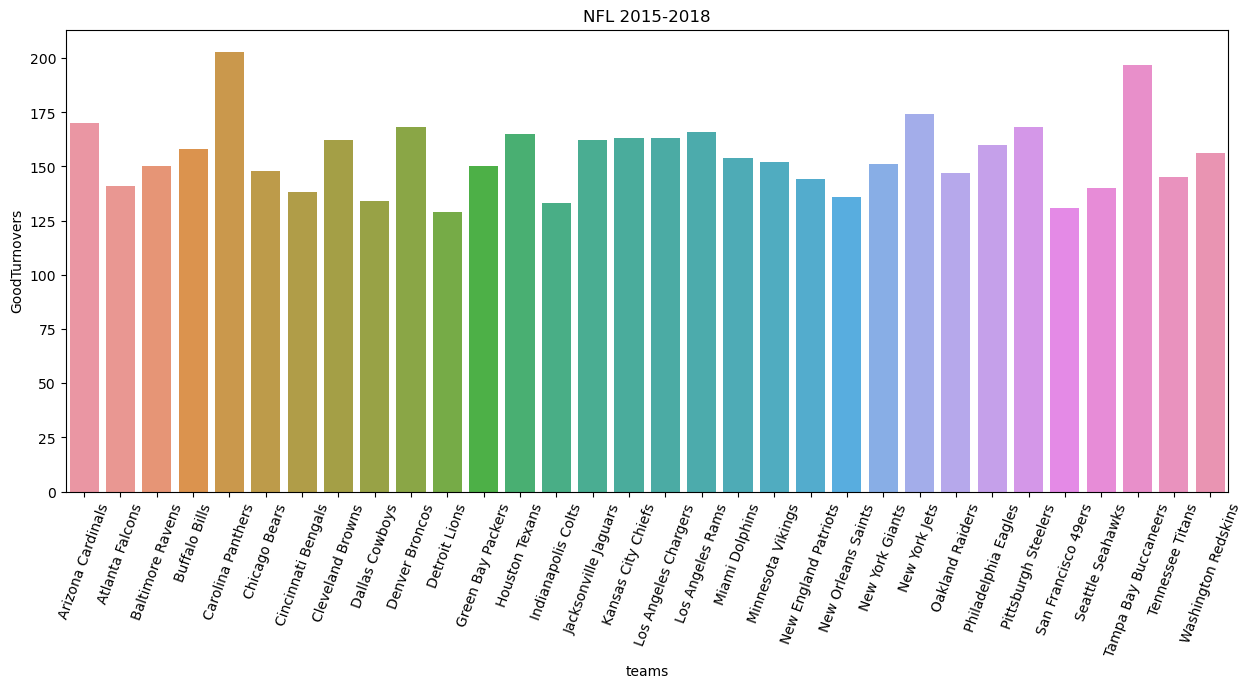

In [21]:
MostPossStat = NFLcombinedstats1.groupby('team')['GoodTurnovers'].sum()

plt.figure(figsize= (15,6))
sns.barplot(x=MostPossStat.index, y=MostPossStat.values)
plt.title('NFL 2015-2018')
plt.xlabel('teams')
plt.ylabel('GoodTurnovers')
plt.xticks(rotation=70, ha='center')

In [22]:
#We are able to conclude through this analysis that a team winning possesion through turnovers, while an important statistic DOES NOT
#drastically improve the chances of a team to earn a win! This is very contrary to popular belief

In [23]:
#3. Which variable is the most effective at predicting a win outcome?
#Narrow variables by correlation to y, then whichever variable has the smalles p-val
WinCorrel = NFLcombinedstats1.corr()['Wins'].sort_values(ascending=False)

print(WinCorrel)

Wins               1.000000
WinPerc            0.995815
Games              0.905315
Yards_Gained       0.678855
Points_Gained      0.668350
Yards_Conceded     0.625864
Points_Conceded    0.451151
Pyth               0.034991
BadTurnovers       0.006516
GoodTurnovers     -0.083256
Name: Wins, dtype: float64


In [24]:
#We exclude WinPerc and Games to find that yards_gained was the most significant variable in detereming a win outcome, so we put the resgression to the test
yardsgain_lm = smf.ols(formula = 'Wins ~ Yards_Gained', data=NFLcombinedstats1).fit()
yardsgain_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Wins   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.443
Method:                 Least Squares   F-statistic:                     25.64
Date:                Sun, 14 May 2023   Prob (F-statistic):           1.95e-05
Time:                        17:19:54   Log-Likelihood:                -111.30
No. Observations:                  32   AIC:                             226.6
Df Residuals:                      30   BIC:                             229.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -82.2366     24.520     -3.354      0.002    -132.314     -32.159
Yards_Gained     0.0040      0.001      5.064      0.000       0.002       0.006
==============================================================================
Omnibus:                        3.056   Durbin-Watson:                   2.103
Prob(Omnibus):                  0.217   Jarque-Bera (JB):                1.775
Skew:                          -0.512   Prob(JB):                        0.412
Kurtosis:                       3.531   Cond. No.                     5.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

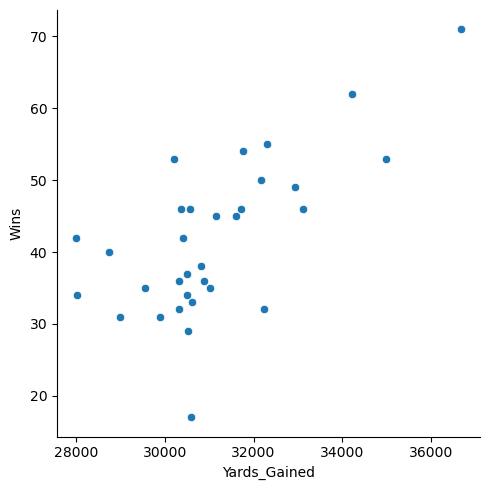

In [25]:
sns.relplot(x='Yards_Gained', y='Wins', data = NFLcombinedstats1)
plt.show()

In [26]:
#From our analysis it is evident that aside from number of games and WinPerc(non-ingame statistic variables), Yards Gained was the most effective match variable
#In order to produce a win!

In [27]:
#4. Who was the most dominant team away from home between the 2015 to 2018 season?

In [28]:
MostSuccessAway = games4away.pivot_table(index = 'team', values =  'away_win', aggfunc = np.sum)
MostSuccessAway = MostSuccessAway.sort_values('away_win', ascending = False)
MDAway = games4away.groupby('team')['away_win'].sum().idxmax()
print(f"The {MDAway} took the most wins on the road, they were a menace!")
MostSuccessAway.head(8)

The New England Patriots took the most wins on the road, they were a menace!


,away_win
team,
New England Patriots,30
Kansas City Chiefs,28
Seattle Seahawks,27
Pittsburgh Steelers,26
New Orleans Saints,24
Minnesota Vikings,23
Atlanta Falcons,23
Los Angeles Rams,21


In [29]:
AwaySuccess = MostSuccessAway[MostSuccessAway['away_win'] > 20]
print(AwaySuccess)

                      away_win
team                          
New England Patriots        30
Kansas City Chiefs          28
Seattle Seahawks            27
Pittsburgh Steelers         26
New Orleans Saints          24
Minnesota Vikings           23
Atlanta Falcons             23
Los Angeles Rams            21
Dallas Cowboys              21
Green Bay Packers           21


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

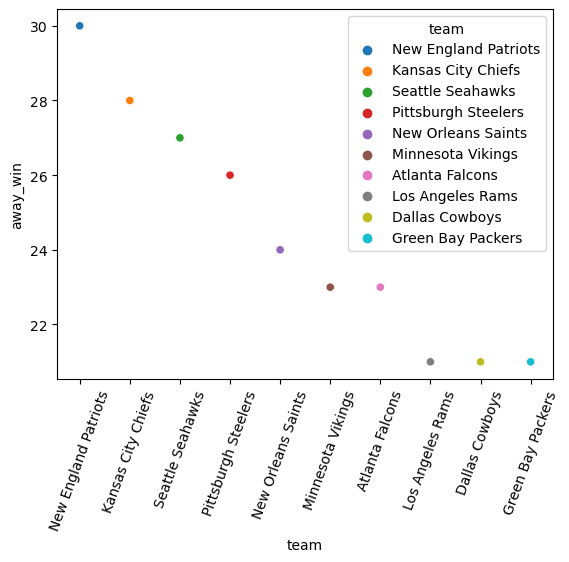

In [30]:
sns.scatterplot(data=AwaySuccess, x='team', y='away_win', hue = 'team')
plt.xticks(rotation=70, ha='center')

In [31]:
#As we can see from our analysis and visualization, the New England Patriots were the most succesful team on the road by
#some distance when compared to the top ten away teams

In [32]:
#Extra Credit IDEA
#Predictive analysis using ML model ---> Which team will more than likely win the most games in the last and following year
#based off our current data

In [33]:
WinCorrel = NFLcombinedstats1.corr().abs()['Wins'].sort_values(ascending=False)
print(WinCorrel)

Wins               1.000000
WinPerc            0.995815
Games              0.905315
Yards_Gained       0.678855
Points_Gained      0.668350
Yards_Conceded     0.625864
Points_Conceded    0.451151
GoodTurnovers      0.083256
Pyth               0.034991
BadTurnovers       0.006516
Name: Wins, dtype: float64


In [34]:
games23['team'] = games23['home']
games23.head()

,index,away,home,pts_win,pts_loss,yds_win,yds_loss,turnovers_win,turnovers_loss,winner,date,year,home_win,away_win,count,team
0,3989,Pittsburgh Steelers,New England Patriots,28,21,361,464,0,1,New England Patriots,September 10,2015,1,0,1,New England Patriots
1,3990,Seattle Seahawks,St. Louis Rams,34,31,352,343,3,1,St. Louis Rams,September 13,2015,1,0,1,St. Louis Rams
2,3991,Green Bay Packers,Chicago Bears,31,23,322,402,0,1,Green Bay Packers,September 13,2015,0,1,1,Chicago Bears
3,3992,Miami Dolphins,Washington Redskins,17,10,256,349,1,2,Miami Dolphins,September 13,2015,0,1,1,Washington Redskins
4,3993,Kansas City Chiefs,Houston Texans,27,20,330,396,0,2,Kansas City Chiefs,September 13,2015,0,1,1,Houston Texans


In [35]:
games23.sort_values(by='team').reset_index()

,level_0,index,away,home,pts_win,pts_loss,yds_win,yds_loss,turnovers_win,turnovers_loss,winner,date,year,home_win,away_win,count,team
0,1109,5098,Carolina Panthers,Arizona Cardinals,38,20,413,248,1,2,Carolina Panthers,September 22,2019,0,1,1,Arizona Cardinals
1,454,4443,Washington Redskins,Arizona Cardinals,31,23,369,333,0,2,Arizona Cardinals,December 4,2016,1,0,1,Arizona Cardinals
2,236,4225,Green Bay Packers,Arizona Cardinals,38,8,381,178,2,4,Arizona Cardinals,December 27,2015,1,0,1,Arizona Cardinals
3,485,4474,New Orleans Saints,Arizona Cardinals,48,41,488,425,1,2,New Orleans Saints,December 18,2016,0,1,1,Arizona Cardinals
4,957,4946,Oakland Raiders,Arizona Cardinals,23,21,325,282,0,2,Oakland Raiders,November 18,2018,0,1,1,Arizona Cardinals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330,1296,5285,New York Giants,Washington Redskins,41,35,552,361,0,0,New York Giants,December 22,2019,0,1,1,Washington Redskins
1331,1135,5124,New England Patriots,Washington Redskins,33,7,442,223,1,2,New England Patriots,October 6,2019,0,1,1,Washington Redskins
1332,825,4814,Indianapolis Colts,Washington Redskins,21,9,281,334,2,1,Indianapolis Colts,September 16,2018,0,1,1,Washington Redskins
1333,191,4180,Dallas Cowboys,Washington Redskins,19,16,318,266,3,1,Dallas Cowboys,December 7,2015,0,1,1,Washington Redskins


In [36]:
games23['W'] = np.where(games23['team'] == games23['winner'],1,0)
games23.head(3)

,index,away,home,pts_win,pts_loss,yds_win,yds_loss,turnovers_win,turnovers_loss,winner,date,year,home_win,away_win,count,team,W
0,3989,Pittsburgh Steelers,New England Patriots,28,21,361,464,0,1,New England Patriots,September 10,2015,1,0,1,New England Patriots,1
1,3990,Seattle Seahawks,St. Louis Rams,34,31,352,343,3,1,St. Louis Rams,September 13,2015,1,0,1,St. Louis Rams,1
2,3991,Green Bay Packers,Chicago Bears,31,23,322,402,0,1,Green Bay Packers,September 13,2015,0,1,1,Chicago Bears,0


In [37]:
#setting a numeric target variable
games23['target'] = (games23['W'] == 1).astype('category').cat.codes
games23.head(7)

,index,away,home,pts_win,pts_loss,yds_win,yds_loss,turnovers_win,turnovers_loss,winner,date,year,home_win,away_win,count,team,W,target
0,3989,Pittsburgh Steelers,New England Patriots,28,21,361,464,0,1,New England Patriots,September 10,2015,1,0,1,New England Patriots,1,1
1,3990,Seattle Seahawks,St. Louis Rams,34,31,352,343,3,1,St. Louis Rams,September 13,2015,1,0,1,St. Louis Rams,1,1
2,3991,Green Bay Packers,Chicago Bears,31,23,322,402,0,1,Green Bay Packers,September 13,2015,0,1,1,Chicago Bears,0,0
3,3992,Miami Dolphins,Washington Redskins,17,10,256,349,1,2,Miami Dolphins,September 13,2015,0,1,1,Washington Redskins,0,0
4,3993,Kansas City Chiefs,Houston Texans,27,20,330,396,0,2,Kansas City Chiefs,September 13,2015,0,1,1,Houston Texans,0,0
5,3994,Carolina Panthers,Jacksonville Jaguars,20,9,263,265,1,3,Carolina Panthers,September 13,2015,0,1,1,Jacksonville Jaguars,0,0
6,3995,Indianapolis Colts,Buffalo Bills,27,14,342,304,0,3,Buffalo Bills,September 13,2015,1,0,1,Buffalo Bills,1,1


In [38]:
WinCorr2 = games23.corr().abs()['target'].sort_values(ascending=False)
print(WinCorr2)

away_win          1.000000
home_win          1.000000
W                 1.000000
target            1.000000
yds_win           0.093172
pts_win           0.059506
turnovers_win     0.048155
yds_loss          0.042459
turnovers_loss    0.039240
year              0.009611
index             0.002042
pts_loss          0.000658
count                  NaN
Name: target, dtype: float64


In [39]:
## Nico's annotation starts here 
## the idea is to put home and away team's name into X, so that retain the team names in the X_train and X_test variables so that we can map them back after getting prediction

In [40]:
## add 'home
features = ['home','away','yds_win', 'pts_win', 'turnovers_win', 'yds_loss', 'turnovers_loss']   # features / independent variables 
target = ['target']

X = games23[features]
Y = games23[target].values.ravel()

# Y= []
# for val in games23[target].values:
#     if val == 'target':
#         Y.append(1)
#     else:
#         Y.append(0)

In [41]:
X.head()

,home,away,yds_win,pts_win,turnovers_win,yds_loss,turnovers_loss
0,New England Patriots,Pittsburgh Steelers,361,28,0,464,1
1,St. Louis Rams,Seattle Seahawks,352,34,3,343,1
2,Chicago Bears,Green Bay Packers,322,31,0,402,1
3,Washington Redskins,Miami Dolphins,256,17,1,349,2
4,Houston Texans,Kansas City Chiefs,330,27,0,396,2


In [42]:
#Y.head()

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

#Removed this priorly proposed split below due to data type and sought after result
#games23.sort_values('year', inplace=True)


#train_data = games23[games23['year'] < 2018]
#test_data = games23[games23['year'] >= 2018]

#X_train = train_data.drop('target', axis=1)  
#Y_train = train_data['target']

In [44]:
## create X without the names for model training
X_dropnames = X.drop(['home', 'away'], axis=1)
X_train_dropnames = X_train.drop(['home', 'away'], axis=1)
X_test_dropnames = X_test.drop(['home', 'away'], axis=1)

In [45]:
from sklearn.model_selection import cross_validate 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 300, min_samples_split=10)

scoreacc = cross_validate(estimator=rf, X=X_dropnames, y=Y, cv=4, scoring="accuracy")  # use the numerical-only X for training and testing

print("Average Fitting Time:", scoreacc['fit_time'].mean())
print("Average Accuracy:", scoreacc['test_score'].mean())

Average Fitting Time: 0.3135144114494324
Average Accuracy: 0.5235812159464854


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

knn = KNeighborsClassifier()
lr = LogisticRegression()
svm = SVC()
tree = DecisionTreeClassifier()
rf = RandomForestClassifier()

models = {"KNN": knn, "LogisticRegression": lr, "SVM": svm, "DecisionTree": tree, "RandomForest": rf}
results = []

for model_name, model in models.items():
    default = {"Model":model_name, "Fitting Time": np.nan, "Accuracy": np.nan}
    scores = cross_validate(estimator=model, X=X_dropnames, y=Y, cv=4, scoring="accuracy")
    default['Fitting Time'] = scores['fit_time'].mean()
    default['Accuracy'] = scores['test_score'].mean()
    results.append(default)

In [47]:
results = pd.DataFrame(results)
results.sort_values("Accuracy", ascending=False)

,Model,Fitting Time,Accuracy
2,SVM,0.030412,0.563297
1,LogisticRegression,0.010732,0.561791
4,RandomForest,0.116511,0.495880
0,KNN,0.002048,0.492870
3,DecisionTree,0.002848,0.468909


In [48]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

scores = cross_validate(estimator=lr, X=X_dropnames, y=Y, cv=5, scoring="accuracy")

print("Average Fitting Time:", scores['fit_time'].mean())
print("Average Accuracy:", scores['test_score'].mean())

Average Fitting Time: 0.015906524658203126
Average Accuracy: 0.5565543071161049


In [49]:
#Test of ML models
lr.fit(X_train_dropnames, Y_train)

#Predict the team with the most wins in the final season
predict_winner = lr.predict(X_test_dropnames)
predict_winner
#Printing the predicted winning team
# print("Based off our model the predicted winning team is:", predict_winner)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1], dtype=int8)

In [50]:
## Note that the shape of the predict_winner is the same as the X_test and Y_test
print("Shape of X_test:", X_test.shape)
print("Shape of X_test_dropnames:", X_test_dropnames.shape)
print("Shape of Y_test:", Y_test.shape)
print("Shape of predict_winner:", predict_winner.shape)

Shape of X_test: (267, 7)
Shape of X_test_dropnames: (267, 5)
Shape of Y_test: (267,)
Shape of predict_winner: (267,)


In [51]:
## Making a binary prediction to the original team name
predicted_winner_names = np.where(predict_winner == 1, X_test['home'], X_test['away'])   ## if predict_winner == 1, then home team wins, else away team wins
predicted_winner_names[:10]

array(['Philadelphia Eagles', 'Denver Broncos', 'San Francisco 49ers',
       'Washington Redskins', 'Los Angeles Rams', 'Los Angeles Chargers',
       'Tampa Bay Buccaneers', 'Cincinnati Bengals', 'Chicago Bears',
       'Dallas Cowboys'], dtype=object)

In [52]:
## We can use the same method to get the actual winner names
actual_winner_names = np.where(Y_test == 1, X_test['home'], X_test['away'])   ## if predict_winner == 1, then home team wins, else away team wins
actual_winner_names[:10]

array(['Detroit Lions', 'Denver Broncos', 'San Francisco 49ers',
       'Washington Redskins', 'Los Angeles Rams', 'Los Angeles Chargers',
       'Tampa Bay Buccaneers', 'Cincinnati Bengals', 'Chicago Bears',
       'Dallas Cowboys'], dtype=object)

In [70]:
## Writing a for loop to print out the predicted winner and the actual winner
#for home, away, predicted_winner, actual_winner in zip(X_test['home'], X_test['away'], predicted_winner_names, actual_winner_names):
    #print(f"Home: {home}, Away: {away}, Predicted Winner: {predicted_winner}, Actual Winner: {actual_winner}")
winner_counts = {}  
sum_results = 0

for home, away, predicted_winner, actual_winner in zip(X_test['home'], X_test['away'], predicted_winner_names, actual_winner_names):
    print(f"Home: {home}, Away: {away}, Predicted Winner: {predicted_winner}, Actual Winner: {actual_winner}")
    sum_results += 1  # Increment the sum_results variable by 1 for each iteration

    if actual_winner not in winner_counts:
        winner_counts[actual_winner] = 1
    else:
        winner_counts[actual_winner] += 1

print("Total Results:", sum_results)

most_frequent_winner = max(winner_counts, key=winner_counts.get)
print("Predicted Most Frequent Winner:", most_frequent_winner)

Home: Philadelphia Eagles, Away: Detroit Lions, Predicted Winner: Philadelphia Eagles, Actual Winner: Detroit Lions
Home: Denver Broncos, Away: Indianapolis Colts, Predicted Winner: Denver Broncos, Actual Winner: Denver Broncos
Home: San Francisco 49ers, Away: Green Bay Packers, Predicted Winner: San Francisco 49ers, Actual Winner: San Francisco 49ers
Home: Washington Redskins, Away: Green Bay Packers, Predicted Winner: Washington Redskins, Actual Winner: Washington Redskins
Home: Los Angeles Rams, Away: Green Bay Packers, Predicted Winner: Los Angeles Rams, Actual Winner: Los Angeles Rams
Home: Los Angeles Chargers, Away: Cleveland Browns, Predicted Winner: Los Angeles Chargers, Actual Winner: Los Angeles Chargers
Home: Tampa Bay Buccaneers, Away: Seattle Seahawks, Predicted Winner: Tampa Bay Buccaneers, Actual Winner: Tampa Bay Buccaneers
Home: Cincinnati Bengals, Away: Oakland Raiders, Predicted Winner: Cincinnati Bengals, Actual Winner: Cincinnati Bengals
Home: Denver Broncos, Away